In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [19]:
# 1. Fonction de chargement et préparation initiale
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    df = df.dropna(subset=['DATE'])
    df = df.sort_values('DATE')
    
    # Split temporel
    total_rows = len(df)
    train_idx = int(total_rows * 0.7)
    val_idx = int(total_rows * 0.85)
    
    train_df = df.iloc[:train_idx]
    val_df = df.iloc[train_idx:val_idx]
    test_df = df.iloc[val_idx:]
    
    return train_df, val_df, test_df, df


In [20]:
# 2. Analyse de la distribution des quantités
def analyze_quantity_distribution(train_df, val_df, test_df):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    sns.histplot(data=train_df, x='QUANTITE', bins=50)
    plt.title('Distribution Train')
    plt.yscale('log')
    
    plt.subplot(132)
    sns.histplot(data=val_df, x='QUANTITE', bins=50)
    plt.title('Distribution Validation')
    plt.yscale('log')
    
    plt.subplot(133)
    sns.histplot(data=test_df, x='QUANTITE', bins=50)
    plt.title('Distribution Test')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques descriptives
    stats_df = pd.DataFrame({
        'Train': train_df['QUANTITE'].describe(),
        'Validation': val_df['QUANTITE'].describe(),
        'Test': test_df['QUANTITE'].describe()
    })
    return stats_df

In [27]:
# 3. Analyse temporelle
def analyze_temporal_patterns(df):
    # Agrégation par jour
    daily_qty = df.groupby('DATE')['QUANTITE'].agg(['mean', 'sum', 'count']).reset_index()
    
    # Créer un graphique avec plusieurs sous-graphiques
    fig = plt.figure(figsize=(15, 10))
    
    # Quantité moyenne par jour
    plt.subplot(211)
    plt.plot(daily_qty['DATE'], daily_qty['mean'])
    plt.title('Moyenne quotidienne des quantités')
    plt.xlabel('Date')
    plt.ylabel('Quantité moyenne')
    
    # Ajouter des lignes verticales pour les splits
    split_indices = [int(len(daily_qty) * 0.7), int(len(daily_qty) * 0.85)]
    split_dates = [daily_qty['DATE'].iloc[idx] for idx in split_indices]
    
    for date in split_dates:
        plt.axvline(x=date, color='r', linestyle='--', alpha=0.5)
        plt.text(date, plt.ylim()[1], 'Split', rotation=90, verticalalignment='top')
    
    # Box plot mensuel
    plt.subplot(212)
    daily_qty['month'] = daily_qty['DATE'].dt.to_period('M')
    sns.boxplot(data=daily_qty, x='month', y='mean')
    plt.title('Distribution mensuelle des quantités moyennes')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return daily_qty

In [28]:
# 4. Analyse par établissement et article
def analyze_categorical_distributions(train_df, val_df, test_df):
    def get_top_categories(df, column, n=10):
        return df[column].value_counts().nlargest(n)
    
    # Comparaison des distributions pour ETBDES
    etb_dist = pd.DataFrame({
        'Train': get_top_categories(train_df, 'ETBDES'),
        'Validation': get_top_categories(val_df, 'ETBDES'),
        'Test': get_top_categories(test_df, 'ETBDES')
    }).fillna(0)
    
    # Comparaison des distributions pour ARTDES
    art_dist = pd.DataFrame({
        'Train': get_top_categories(train_df, 'ARTDES'),
        'Validation': get_top_categories(val_df, 'ARTDES'),
        'Test': get_top_categories(test_df, 'ARTDES')
    }).fillna(0)
    
    return etb_dist, art_dist

In [29]:
# 5. Analyse des valeurs aberrantes
def analyze_outliers(train_df, val_df, test_df):
    def get_outliers_stats(df):
        Q1 = df['QUANTITE'].quantile(0.25)
        Q3 = df['QUANTITE'].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[df['QUANTITE'] > upper_bound]
        return len(outliers), outliers['QUANTITE'].mean()
    
    outliers_stats = pd.DataFrame({
        'Train': get_outliers_stats(train_df),
        'Validation': get_outliers_stats(val_df),
        'Test': get_outliers_stats(test_df)
    }, index=['Nombre de valeurs aberrantes', 'Moyenne des valeurs aberrantes'])
    
    return outliers_stats

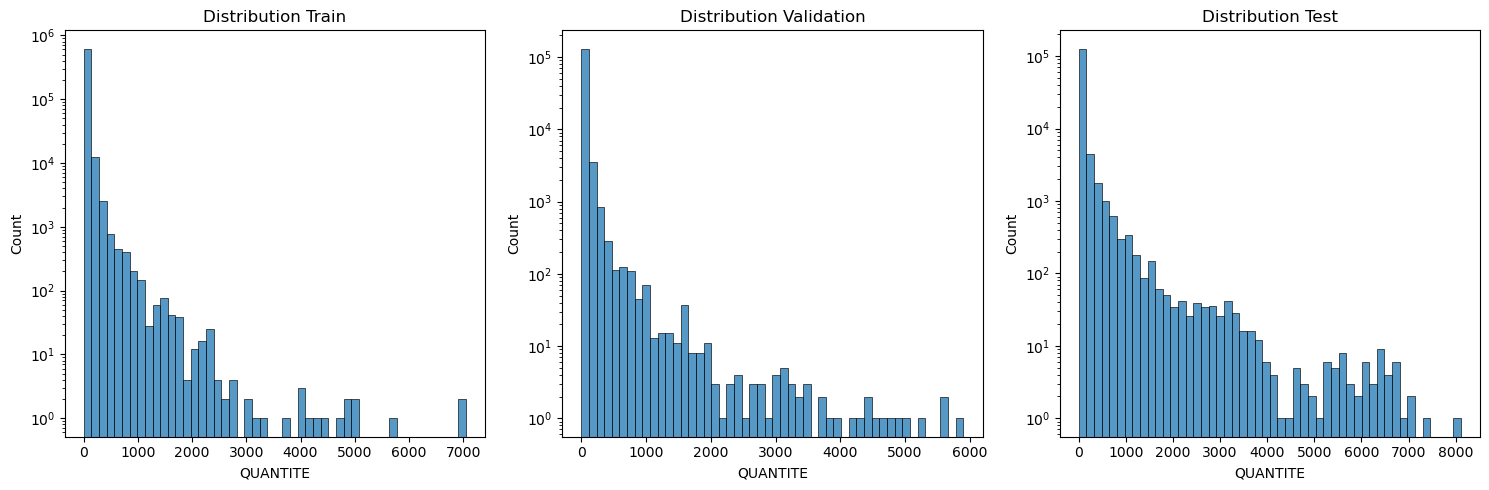

,Train,Validation,Test
count,632365.000000,135507.000000,135507.000000
mean,28.173669,29.632831,62.008634
std,70.487857,101.454120,242.547924
min,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000
50%,10.000000,10.000000,10.000000
75%,30.000000,30.000000,40.000000
max,7050.000000,5900.000000,8110.000000


'\n\n'

In [30]:
# 1. Chargement des données
train_df, val_df, test_df, full_df = load_and_prepare_data("Final_data/donnees_completes_logistique_2022-2024.csv")

# 2. Distribution des quantités
stats_df = analyze_quantity_distribution(train_df, val_df, test_df)
display(stats_df)

"""

"""

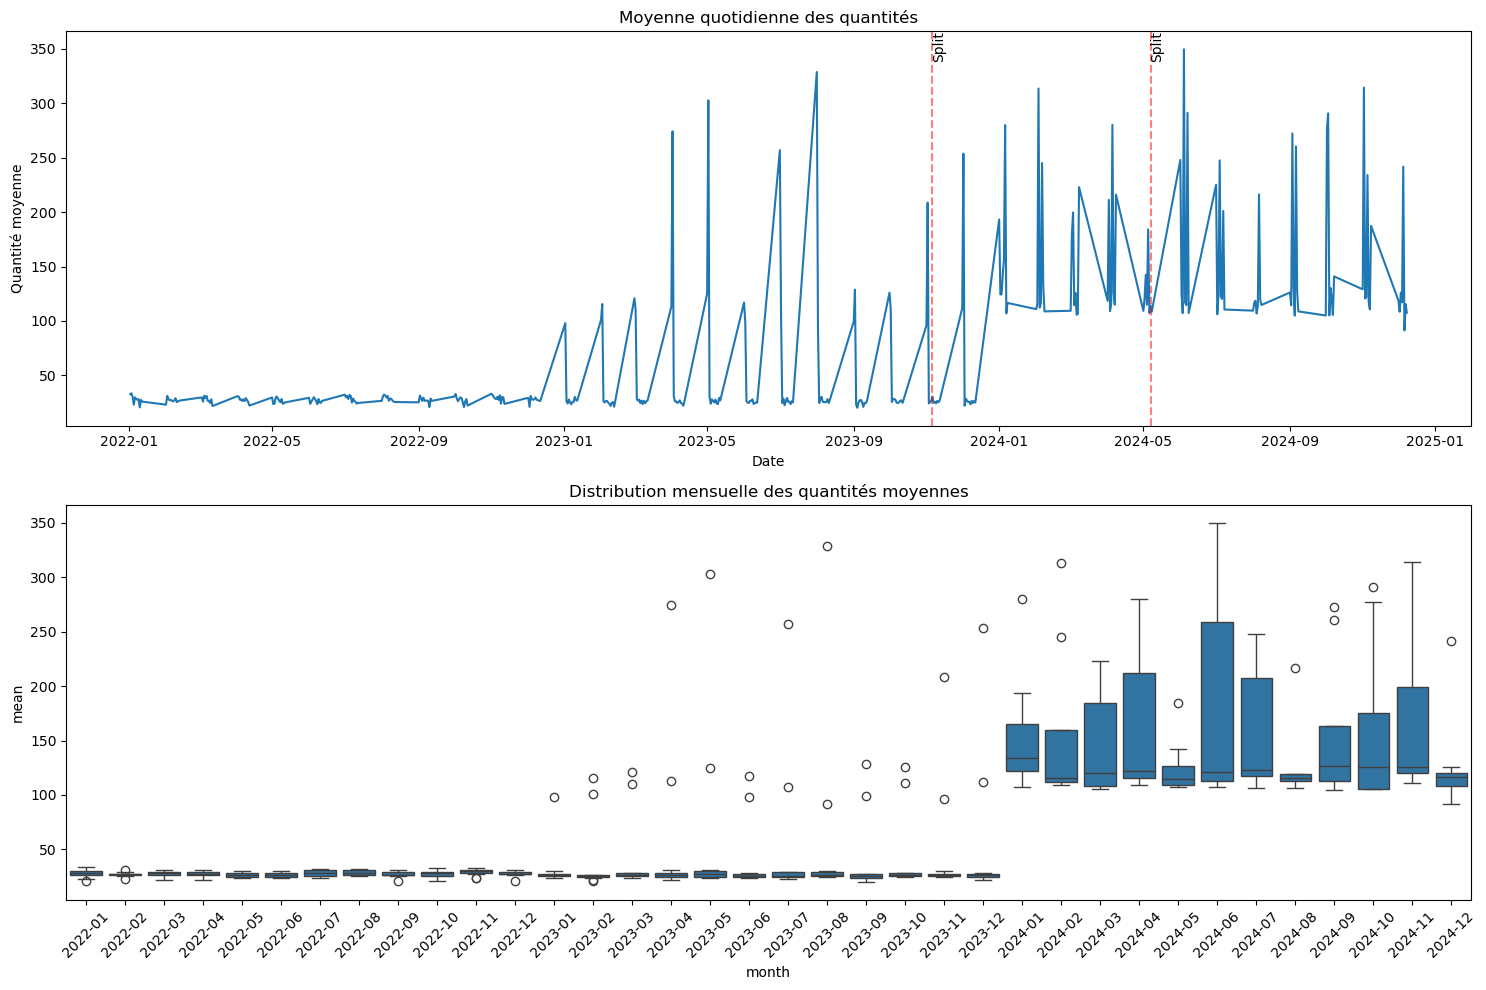

In [31]:
# 3. Analyse temporelle
daily_patterns = analyze_temporal_patterns(full_df)


In [32]:
# 4. Analyse des distributions catégorielles
etb_dist, art_dist = analyze_categorical_distributions(train_df, val_df, test_df)
display(etb_dist)
display(art_dist)

,Train,Validation,Test
ETBDES,,,
CH BARENTIN,12846,2410,3781
CH ROUVRAY,35627,12834,11573
CHU ROUEN BOIS GUILLAUME,46494,8931,8338
CHU ROUEN CH.NICOLLE,290372,51090,37650
CHU ROUEN EHPAD BOUCICAUT,14193,3564,5408
CHU ROUEN OISSEL,26310,6839,8095
CHU ROUEN SAINT JULIEN,53483,12249,11818
DARNETAL,40533,14700,11519
HOPITAL DE NEUFCHATEL,24401,4585,6270


,Train,Validation,Test
ARTDES,,,
ALESE CARREE,19014.0,3371.0,2649.0
BANDEAU DE LAVAGE,23012.0,3832.0,2813.0
DRAP 1 PLACE,22210.0,4255.0,3311.0
DRAP 1 PLACE LOCATION,0.0,0.0,2827.0
GANT DE TOILETTE,19829.0,3749.0,2770.0
LAVETTE,23156.0,4250.0,3165.0
SAC A LINGE JAUNE,13613.0,0.0,0.0
SAC A LINGE ORANGE,16408.0,3250.0,0.0
SAC A LINGE VERT,17003.0,3315.0,0.0


In [33]:
# 5. Analyse des valeurs aberrantes
outliers_stats = analyze_outliers(train_df, val_df, test_df)
display(outliers_stats)

,Train,Validation,Test
Nombre de valeurs aberrantes,61794.000000,11655.000000,16154.0000
Moyenne des valeurs aberrantes,148.672848,187.249163,393.0377
